In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downloading and Saving Dataset

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16



In [3]:
# install keras tuner for hyperparameter optimization
!pip install keras-tuner -q
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-3-9e41ff3872c4>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [4]:
# upgrade scikit learn to plot ROC curves
!pip install --upgrade scikit-learn
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


Note: I used visual studio for below step, to shrink size of the files located in the drive folder.

In [5]:
# Replace these paths with the actual paths to your dataset folders
#data_dir = '/content/drive/MyDrive/Deep_Learning_Spring24/Assignment/lung_colon_image_set'
#filepaths = []
#image_data = []
#labels = []


#folds = os.listdir(data_dir)

#for fold in folds:
#    foldpath = os.path.join(data_dir, fold)
#    flist = os.listdir(foldpath)

#    for f in flist:
#        f_path = os.path.join(foldpath , f)
#        filelist = os.listdir(f_path)

#        for file in filelist:
#            fpath = os.path.join(f_path , file)
#            try:
#              # Open the image using PIL (or you can use OpenCV) within a 'with' statement
#              with Image.open(fpath) as image:
#                if image is not None:
#                  # Resize images
#                  im = image.resize((120,120), Image.LANCZOS)
#                  # Append image and label to respective lists
#                  image_data.append(np.array(im))
#                else:
#                  print(f"Error opening image '{fpath}': NoneType object returned")
#            except Exception as e:
#              print(f"Error opening image '{fpath}': {e}")
#            # Assign the label of the images according to the folder they belongs to.
#            if f == 'colon_aca':
#                labels.append('Colon adenocarcinoma')

#            elif f == 'colon_n':
#                labels.append('Colon Benign Tissue')

#            elif f == 'lung_aca':
#                labels.append('Lung adenocarcinoma')

#            elif f == 'lung_n':
#                labels.append('Lung Benign Tissue')

#            elif f == 'lung_scc':
#                labels.append('Lung Squamous Cell Carcinoma')

#tr_labels = np.array(labels)
#image_matrix = np.array([np.array(img) for img in image_data])

#np.save("/content/drive/MyDrive/DeepLearning/Assignment/data120.npy",image_matrix)
#np.save("/content/drive/MyDrive/DeepLearning/Assignment/labels120.npy",tr_labels)


#Call data from directory

In [6]:
file_dir = "/content/drive/MyDrive/DeepLearning/Assignment/"
data = np.load(file_dir + "data120.npy")
labels = np.load(file_dir + "labels120.npy", allow_pickle=True)
print(labels)

['Colon adenocarcinoma' 'Colon adenocarcinoma' 'Colon adenocarcinoma' ...
 'Lung Squamous Cell Carcinoma' 'Lung Squamous Cell Carcinoma'
 'Lung Squamous Cell Carcinoma']


In [7]:
labels[1:30]

array(['Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma'], dtype='<U28')

In [8]:
# there is 5 unique classes
print(f'Number of unique classes in the dataset = {len(np.unique(labels))}')


Number of unique classes in the dataset = 5


In [9]:
# check image size and number of classes
print(f'Number of observations = {str(data.shape[0])}')
print(f'Image size  = {str(data.shape[1])} x {str(data.shape[2])}')

Number of observations = 25000
Image size  = 120 x 120


# Preprocessing and EDA (Exploratory Data Analysis)


## Converting the Target Values to the One-Hot-Encoded Format

In [10]:
# since our label variables are categorical, we need to transform them to numeric first using label encoder
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labels)
# then use to_categorical for applying one-hot coding
labels_matrix= to_categorical(label_encoded[:25000])

In [11]:
# check class mapping
mapped_class = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# labels_matrix column indexes will corresponds the assigned integers
print("Integer to categorical classes:")
print(mapped_class)


Integer to categorical classes:
{'Colon Benign Tissue': 0, 'Colon adenocarcinoma': 1, 'Lung Benign Tissue': 2, 'Lung Squamous Cell Carcinoma': 3, 'Lung adenocarcinoma': 4}


## Visualizing Sample Images

In [12]:
# define a seed value to reproduce random numbers
seed_number = 42
np.random.seed(seed_number)
random_figure = np.random.randint(1,len(data), 15)
print(random_figure)

[23655 15796   861  5391 21576 11965 11285 22119  6266 16851  4427 21963
 14424 11364 16024]


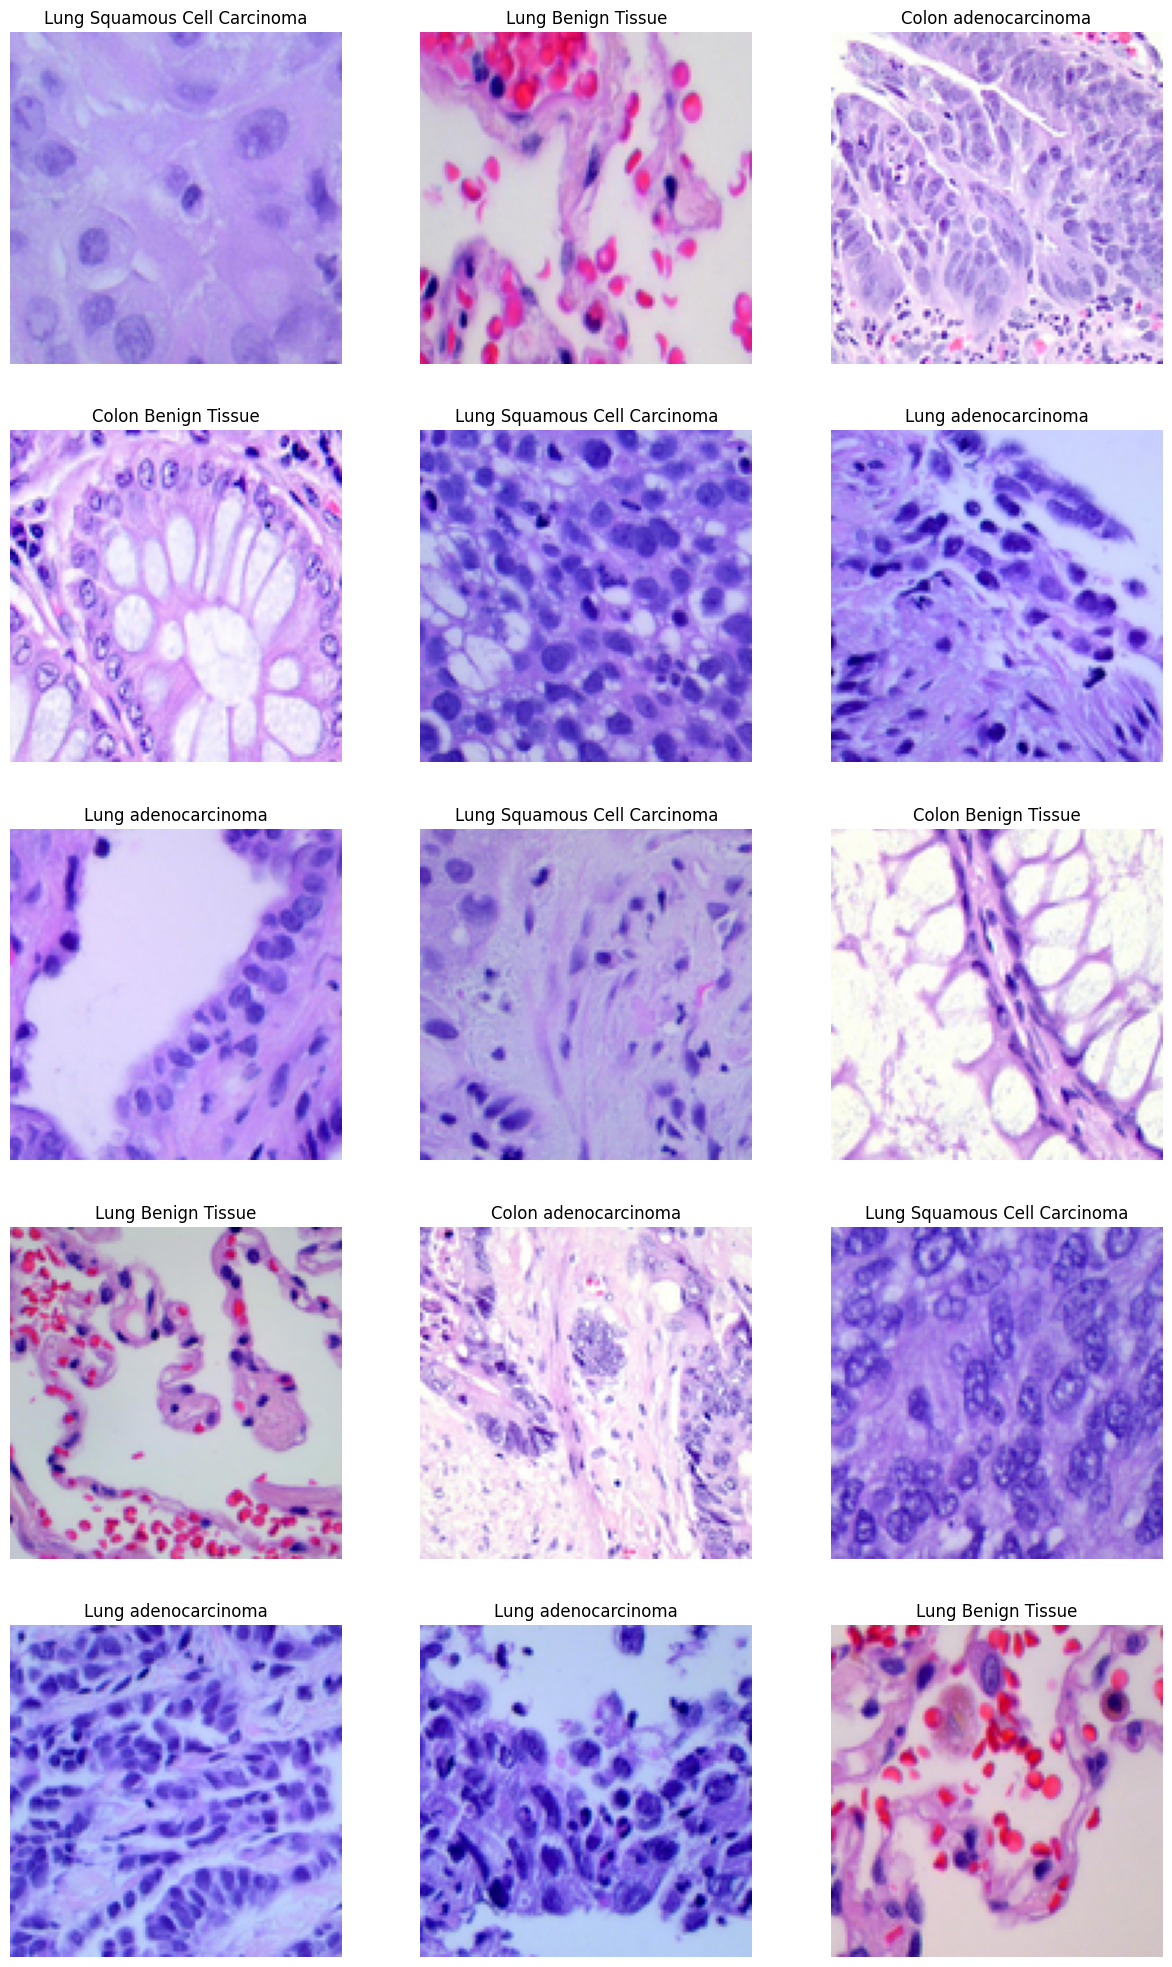

In [13]:
# plot randomly chosen 15 images
plt.figure(figsize= (15, 25))

i = 0  # define sublocation of the figures on graph by iterating i
for item in random_figure:
    # identify label name
    label_names = labels[item]
    # define subplot
    plt.subplot(5, 3, i + 1)
    # plot pixel data
    plt.imshow(data[item])
    # use label name as title
    plt.title(label_names, fontsize=12, color= 'black')
    # drop axises
    plt.axis('off')
    i +=1
plt.show()

## Visualizing Class Distribution

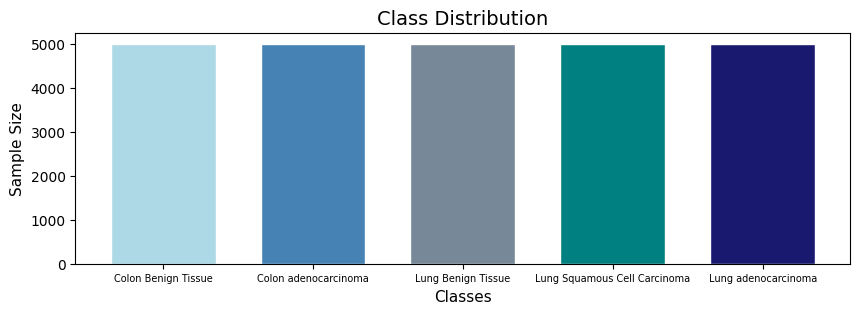

In [14]:
# identify sample sizes for each class
unique_labels, frequency = np.unique(labels, return_counts=True)

# create a bar plot
plt.figure(figsize= (10, 3))
colors = ['lightblue', 'steelblue', 'lightslategray', 'teal','midnightblue']
plt.bar(unique_labels, frequency, width =0.7, color = colors, edgecolor ="white")
plt.xlabel('Classes', fontsize =11)
plt.ylabel('Sample Size', fontsize =11)
plt.xticks( fontsize = 7)
plt.title('Class Distribution', fontsize =14)
plt.show()

##Train-Test-Val Split

In [15]:
# stratified train-test splits with proportions of 60% for training, 20% for validation, and 20% for the test set, using a random seed of 42 for reproducibility
  # 1st step --> split to train and test
X_trainval, X_test, y_trainval, y_test = train_test_split(data, labels_matrix,  train_size = 0.8,  random_state = 42, stratify = labels_matrix)
  # 2nd step --> split to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,  train_size = 0.75,  random_state = 42, stratify = y_trainval)


In [16]:
# check sample sizes across train-test-validation sets
print("train sample shape:",X_train.shape)
print("test sample shape:",X_test.shape)
print("valid sample shape:",X_valid.shape)

train sample shape: (15000, 120, 120, 3)
test sample shape: (5000, 120, 120, 3)
valid sample shape: (5000, 120, 120, 3)


# Evaluation Functions

In [17]:
## define a function to plot loss-acc graphs

def summarize_diagnostics(history):

    plt.figure(figsize= (10, 5))
	# define epochs
    epoch = list(range(1, len(history.history['accuracy'])+1))

	# find the epoch with the maximum accuracy
    index_max_accuracy = np.argmax(history.history['val_accuracy'])  # find index
    max_accuracy = history.history['val_accuracy'][index_max_accuracy] # report max accuracy

	# plot accuracy
    plt.subplot(1,2,1)
    plt.title('Baseline Model Training and Validation Accuracy', fontsize =10)
    plt.plot(epoch, history.history['accuracy'], color='maroon', label='train')
    plt.plot(epoch, history.history['val_accuracy'], color='tab:blue', label='validation')
    plt.scatter(index_max_accuracy + 1, max_accuracy, marker = "h", s= 75, c= 'black', label= str(index_max_accuracy + 1))
    plt.xlabel('Epochs', fontsize =10)
    plt.ylabel('Accuracy', fontsize =10)
    plt.legend(['Training Accuracy', 'Validation Accuracy', f'Best Epoch: {index_max_accuracy + 1}'])


	# find the epoch with the minimum loss
    index_min_loss = np.argmin(history.history['val_loss']) # find index
    min_loss = history.history['val_loss'][index_min_loss]  # report min loss

    # plot loss
    plt.subplot(1,2,2)
    plt.title('Baseline Model Training and Validation Loss', fontsize =10)
    plt.plot(epoch, history.history['loss'], color='maroon', label='train')
    plt.plot(epoch, history.history['val_loss'], color='tab:blue', label='validation')
    plt.scatter(index_min_loss + 1, min_loss, marker = "D", s= 75, c= 'black', label= str(index_min_loss + 1))
    plt.xlabel('Epochs', fontsize =10)
    plt.ylabel('Loss', fontsize =10)
    plt.legend(['Training Loss', 'Validation Loss', f'Best Epoch: {index_min_loss + 1}'], prop = { "size": 10 })
    plt.show()



In [18]:
# define a function to plot confusion matrix
def report_confusion_matrix(ground_t, pred):
    cm = confusion_matrix(ground_t, pred)
    cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_fig.plot(cmap="Blues")
    cm_fig.ax_.set_yticklabels(label_encoder.classes_,fontsize = 8) # define y axis labels
    cm_fig.ax_.set_ylabel("True label",fontsize =10)
    plt.show()


In [19]:
# define a function compute macro - micro averages using OvR
def average_ovr(y_onehot_test, y_score):

    # define number of classes
    n_classes = y_onehot_test.shape[1]

    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()

    # compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # compute macro-average ROC curve and ROC area
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc,  n_classes

In [20]:
# define a function to plot ROC curve
def plot_roc_curve (y_onehot_test, y_score):
    fpr , tpr, roc_auc, n_classes = average_ovr(y_onehot_test, y_score)

    fig, ax = plt.subplots(figsize=(5, 5))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "mediumseagreen", "orchid"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {list(mapped_class.keys())[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
    )
    plt.title("Receiver Operating Characteristic of Multi-class",fontsize = 10)
    plt.legend( prop = { "size": 6 }, loc='lower right')
    plt.show()

# Baseline Model

In [21]:
def build_base_model():
    # create a sequential model
    model = Sequential()

    # 1st convolutional layer with relu activation function and pooling layer + zero padding
    model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu', input_shape = X_train.shape[1:]))
    model.add(layers.MaxPooling2D((2, 2)))

    # 2nd convolutional and pooling layer + zero padding
    model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # a flaten layer to convert 3D to 1D
    model.add(layers.Flatten())
    # a dense layer with 128 units and relu activation
    model.add(layers.Dense(128, activation='relu'))
    # a dense layer with 32 units and relu activation
    model.add(layers.Dense(32, activation='relu'))

    # the last layer with 5 units since there is 5 classes
    model.add(layers.Dense(5, activation='softmax'))

    # select  'adam', loss function and metrics
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [22]:
# define filepath to save the best model across epoches
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/DeepLearning/Assignment/model_base.hp5",   monitor="val_loss", mode="min",  save_best_only=True, verbose=1)

In [23]:
# check details of defined baseline model
model = build_base_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [24]:
 # train the network --> epochs = 10, batch_size = 32
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 5.1097 - accuracy: 0.4676
Epoch 1: val_loss improved from inf to 0.85558, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_base.hp5
469/469 [==============================] - 35s 55ms/step - loss: 5.1097 - accuracy: 0.4676 - val_loss: 0.8556 - val_accuracy: 0.5824
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 0.8483 - accuracy: 0.5817
Epoch 2: val_loss improved from 0.85558 to 0.85023, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_base.hp5
469/469 [==============================] - 17s 35ms/step - loss: 0.8483 - accuracy: 0.5817 - val_loss: 0.8502 - val_accuracy: 0.5838
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 0.7703 - accuracy: 0.6109
Epoch 3: val_loss did not improve from 0.85023
469/469 [==============================] - 16s 33ms/step - loss: 0.7703 - accuracy: 0.6109 - val_loss: 0.8513 - val_accuracy: 0.6136
Epoch 4/10

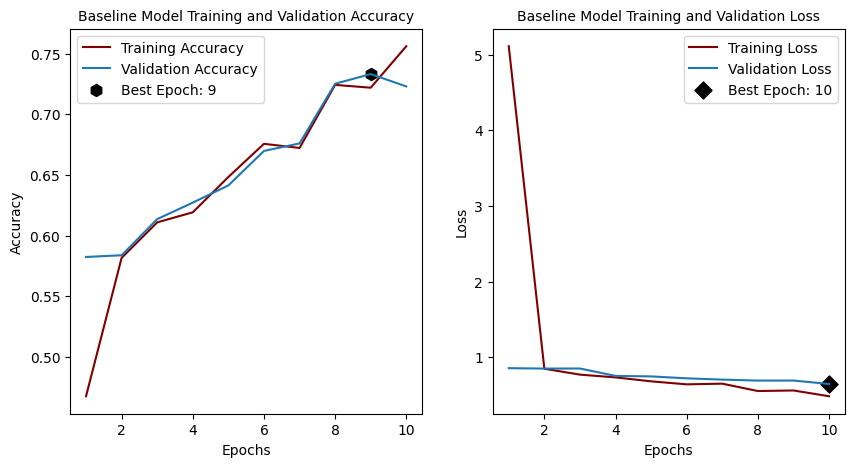

In [25]:
# plot the training and validation losses and accuracies on the training and validation set through epochs
summarize_diagnostics(history)

In [26]:
# prediction based on X_valid
best_base_model = load_model('/content/drive/MyDrive/DeepLearning/Assignment/model_base.hp5')
class_prob_val = best_base_model.predict(X_valid) # predict class probabilities
y_valid_pred= np.argmax(class_prob_val, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 1s 8ms/step


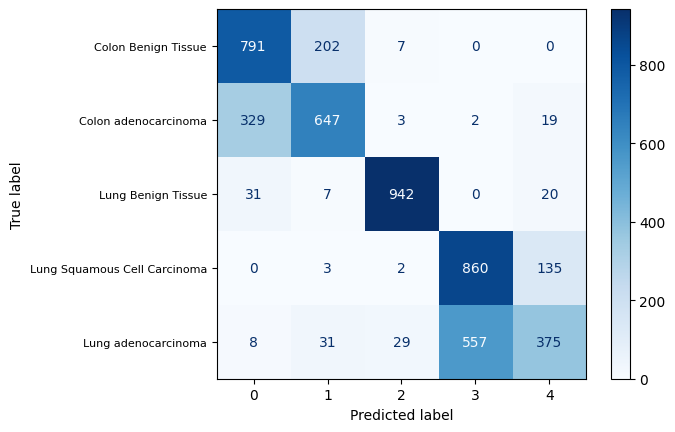

In [27]:
#  report confusion matrix for validation data
y_valid_cat = np.argmax(y_valid, axis=1)
report_confusion_matrix (y_valid_cat, y_valid_pred)

In [28]:
# report performance measures on validation sets
print("\nPerformance measures for validation set:\n",classification_report(y_valid_cat, y_valid_pred, target_names= label_encoder.classes_))


Performance measures for validation set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       0.68      0.79      0.73      1000
        Colon adenocarcinoma       0.73      0.65      0.68      1000
          Lung Benign Tissue       0.96      0.94      0.95      1000
Lung Squamous Cell Carcinoma       0.61      0.86      0.71      1000
         Lung adenocarcinoma       0.68      0.38      0.48      1000

                    accuracy                           0.72      5000
                   macro avg       0.73      0.72      0.71      5000
                weighted avg       0.73      0.72      0.71      5000



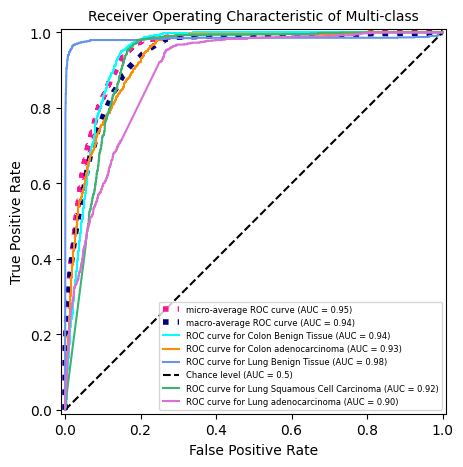

In [29]:
#  plot ROC curve for validation data
plot_roc_curve(y_valid, class_prob_val)

In [30]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test loss:", test_loss," ","test accuracy:",test_accuracy)
# prediction based on X_test
class_prob_test = best_base_model.predict(X_test) # predict class probabilities
y_pred = np.argmax(class_prob_test, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 1s 9ms/step - loss: 0.7292 - accuracy: 0.7216
test loss: 0.7291849851608276   test accuracy: 0.7215999960899353
157/157 [==============================] - 1s 7ms/step


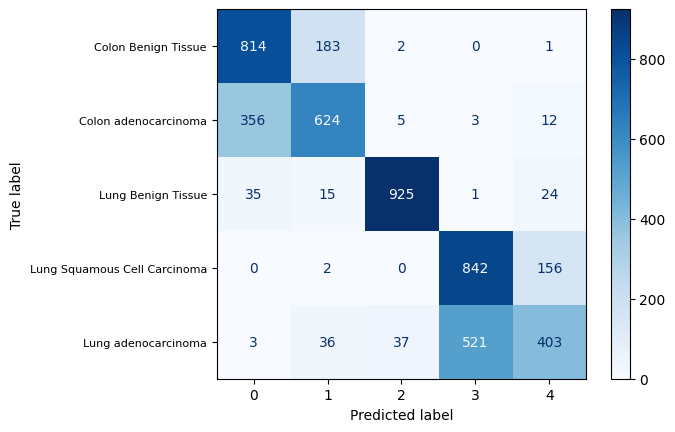

In [31]:
# report confusion matrix for test data
y_test_cat = np.argmax(y_test, axis=1) # convert one-hot encoding format of y_test to class codes
report_confusion_matrix (y_test_cat, y_pred)

In [32]:
# report performance measures on validation and test sets
print("Performance measures for test set:\n", classification_report(y_test_cat, y_pred, target_names= label_encoder.classes_))

Performance measures for test set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       0.67      0.81      0.74      1000
        Colon adenocarcinoma       0.73      0.62      0.67      1000
          Lung Benign Tissue       0.95      0.93      0.94      1000
Lung Squamous Cell Carcinoma       0.62      0.84      0.71      1000
         Lung adenocarcinoma       0.68      0.40      0.51      1000

                    accuracy                           0.72      5000
                   macro avg       0.73      0.72      0.71      5000
                weighted avg       0.73      0.72      0.71      5000



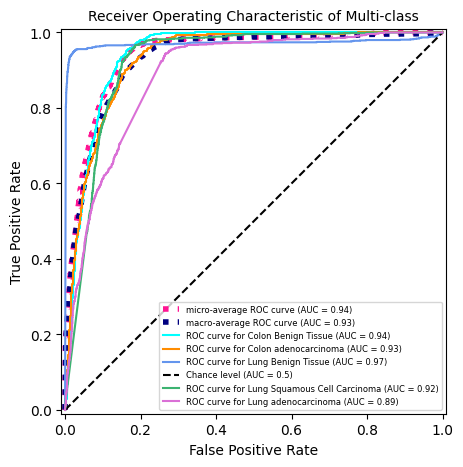

In [33]:
#  plot ROC curve for test data
plot_roc_curve(y_test, class_prob_test)

# Enhanced Model

In [34]:
# use kerasTuner for hyperparameter optimization

def build_enh_model(hp):
    # create a sequential model
    model = Sequential()

    # 1st convolutional layer with relu activation function and pooling layer + zero padding
    model.add(layers.Conv2D(filters=hp.Choice('conv_1_filter', values=[64, 128]),
                            kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
                            padding="same", activation='relu', input_shape = X_train.shape[1:]))
    model.add(layers.MaxPooling2D((3, 3)))


    # 2nd convolutional and pooling layer + zero padding
    model.add(layers.Conv2D(filters=hp.Choice('conv_2_filter', values=[128, 256, 512]),
                                           kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
                                           padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))

    #  a drop layer to decrease overfitting
    model.add(layers.Dropout(rate = hp.Choice('dropout_2', values=[0.1, 0.2, 0.3])))

    # 3rd convolutional and pooling layer + zero padding
    model.add(layers.Conv2D(filters=hp.Choice('conv_3_filter', values=[128, 256, 512]),
                                           kernel_size = hp.Choice('conv_3_kernel', values = [3,5]),
                                           padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))

    #  a drop layer to decrease overfitting
    model.add(layers.Dropout(rate = hp.Choice('dropout_3', values=[0.1, 0.2, 0.3])))

    # a flaten layer to convert 3D to 1D
    model.add(layers.Flatten())
    # a dense layer with relu activation
    model.add(layers.Dense(units=hp.Choice('dense_1_units', values=[64, 128, 256]), activation='relu'))
    # a dense layer with relu activation
    model.add(layers.Dense(units=hp.Choice('dense_2_units', values=[32, 64, 128]), activation='relu'))

    # the last layer with 5 units since there is 5 classes
    model.add(layers.Dense(5, activation='softmax'))

    # select optimizer, loss function and metric
    model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [35]:
# use RandomSearch for hyperparameter optimization
tuner_search=RandomSearch(build_enh_model,
                          max_trials = 10, # define maximum number of trials
                          seed = seed_number,
                          objective='val_accuracy')

In [36]:
# start the trials with 10 epochs and 64 batch size
tuner_search.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=2)

Trial 10 Complete [00h 05m 25s]
val_accuracy: 0.9634000062942505

Best val_accuracy So Far: 0.9721999764442444
Total elapsed time: 00h 39m 38s


In [37]:
# report trial summaries
tuner_search.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 256
conv_2_kernel: 3
dropout_2: 0.2
conv_3_filter: 512
conv_3_kernel: 5
dropout_3: 0.1
dense_1_units: 64
dense_2_units: 32
learning_rate: 0.0001
Score: 0.9721999764442444

Trial 07 summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 128
conv_2_kernel: 5
dropout_2: 0.1
conv_3_filter: 512
conv_3_kernel: 5
dropout_3: 0.2
dense_1_units: 64
dense_2_units: 128
learning_rate: 0.0001
Score: 0.9693999886512756

Trial 00 summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 256
conv_2_kernel: 3
dropout_2: 0.3
conv_3_filter: 256
conv_3_kernel: 5
dropout_3: 0.1
dense_1_units: 128
dense_2_units: 32
learning_rate: 0.0001
Score: 0.9682000279426575

Trial 04 summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 256
conv_2_kernel: 3
dro

In [38]:
# recall best hyperparameters
best_hps = tuner_search.get_best_hyperparameters()[0]

In [39]:
# redefine model structure using best hyperparameters
model_enhanced = build_enh_model(best_hps)

In [40]:
# check model structure
model_enhanced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 40, 40, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 512)      

In [41]:
# define early stopping conditions and checkpoint
stop_early = EarlyStopping( patience=5,  monitor='val_loss',  mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/DeepLearning/Assignment/model_enhanced.hp5",   monitor="val_loss", mode="min",  save_best_only=True, verbose=1)


In [42]:
 # retrain the network using best model structure --> epochs = 32, batch_size = 64
history_enhanced = model_enhanced.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_valid, y_valid), callbacks=[[stop_early], checkpoint])

Epoch 1/32
234/235 [============================>.] - ETA: 0s - loss: 1.7574 - accuracy: 0.6138
Epoch 1: val_loss improved from inf to 0.42187, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_enhanced.hp5
235/235 [==============================] - 34s 122ms/step - loss: 1.7551 - accuracy: 0.6141 - val_loss: 0.4219 - val_accuracy: 0.8082
Epoch 2/32
234/235 [============================>.] - ETA: 0s - loss: 0.3717 - accuracy: 0.8435
Epoch 2: val_loss improved from 0.42187 to 0.38357, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_enhanced.hp5
235/235 [==============================] - 29s 123ms/step - loss: 0.3715 - accuracy: 0.8436 - val_loss: 0.3836 - val_accuracy: 0.8502
Epoch 3/32
234/235 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8793
Epoch 3: val_loss improved from 0.38357 to 0.26941, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_enhanced.hp5
235/235 [==============================] - 29s

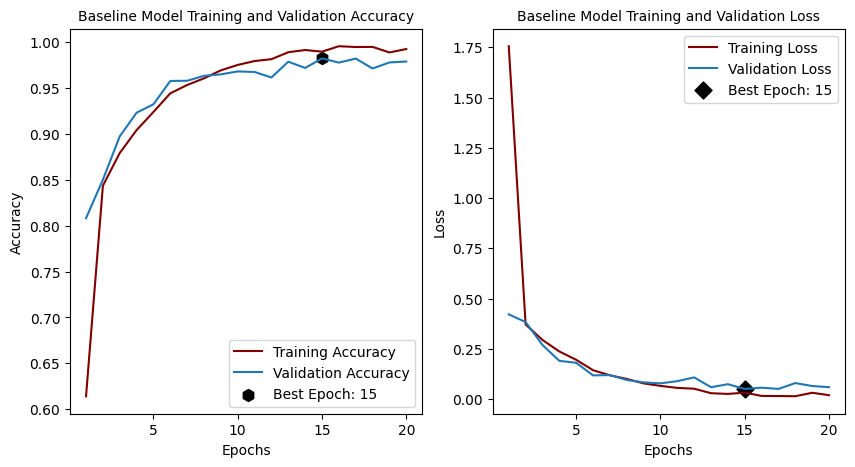

In [43]:
#  the training and validation losses and accuracies on the training and validation set through epochs
summarize_diagnostics(history_enhanced)

In [44]:
best_enhanced_model = load_model('/content/drive/MyDrive/DeepLearning/Assignment/model_enhanced.hp5')
# prediction based on X_valid
class_prob_val = best_enhanced_model.predict(X_valid) # predict class probabilities
y_valid_pred= np.argmax(class_prob_val, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 2s 10ms/step


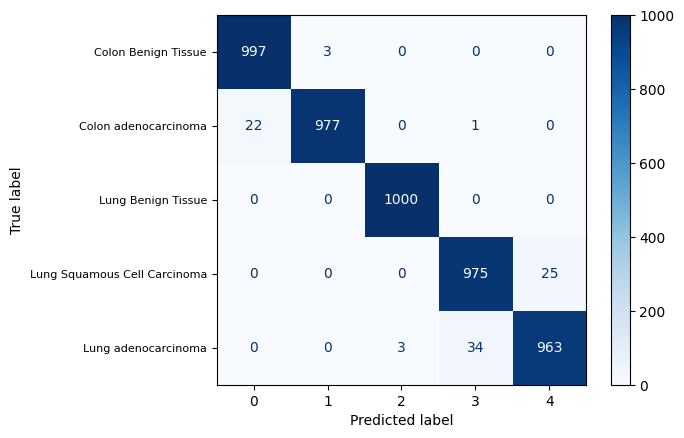

In [45]:
#  report confusion matrix for validation data
report_confusion_matrix (y_valid_cat, y_valid_pred)

In [46]:
# report performance measures on validation sets
print("\nPerformance measures for validation set:\n",classification_report(y_valid_cat, y_valid_pred, target_names= label_encoder.classes_))


Performance measures for validation set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       0.98      1.00      0.99      1000
        Colon adenocarcinoma       1.00      0.98      0.99      1000
          Lung Benign Tissue       1.00      1.00      1.00      1000
Lung Squamous Cell Carcinoma       0.97      0.97      0.97      1000
         Lung adenocarcinoma       0.97      0.96      0.97      1000

                    accuracy                           0.98      5000
                   macro avg       0.98      0.98      0.98      5000
                weighted avg       0.98      0.98      0.98      5000



In [47]:
# evaluate the model
test_loss, test_accuracy = best_enhanced_model.evaluate(X_test, y_test)
print("test loss:",test_loss,"  ","test_accuracy:", test_accuracy)

# prediction based on X_test
class_prob_test = best_enhanced_model.predict(X_test) # predict class probabilities
y_pred = np.argmax(class_prob_test, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 2s 12ms/step - loss: 0.0573 - accuracy: 0.9796
test loss: 0.057271797209978104    test_accuracy: 0.9796000123023987
157/157 [==============================] - 2s 10ms/step


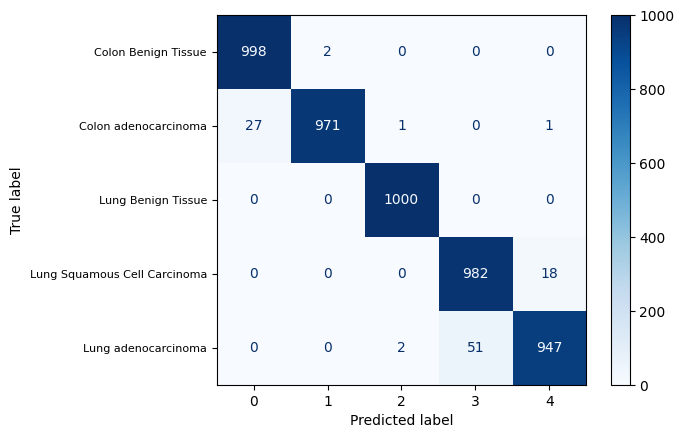

In [48]:
# report confusion matrix for test data
report_confusion_matrix (y_test_cat, y_pred)

In [49]:
# report performance measures on validation and test sets
print("Performance measures for test set:\n", classification_report(y_test_cat, y_pred, target_names= label_encoder.classes_))

Performance measures for test set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       0.97      1.00      0.99      1000
        Colon adenocarcinoma       1.00      0.97      0.98      1000
          Lung Benign Tissue       1.00      1.00      1.00      1000
Lung Squamous Cell Carcinoma       0.95      0.98      0.97      1000
         Lung adenocarcinoma       0.98      0.95      0.96      1000

                    accuracy                           0.98      5000
                   macro avg       0.98      0.98      0.98      5000
                weighted avg       0.98      0.98      0.98      5000



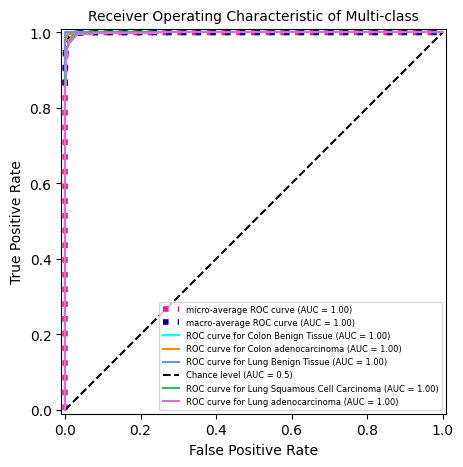

In [50]:
#  plot ROC curve for test data
plot_roc_curve(y_test, class_prob_test)

# Transfer Learning Model


In [51]:
def build_vgg_model():
    # load model
    vgg_model = VGG16()
    # summarize the model
    vgg_model.summary()
    # load model without output layer and specify a new input shape for images (120*120)
    vgg_model = VGG16(include_top=False, input_shape=(120, 120, 3))

    # mark loaded layers as not trainable - freeze them
    for layer in vgg_model.layers:
        layer.trainable = False

    #add flatten layer
    flat1 = layers.Flatten()(vgg_model.layers[-1].output)
    #add 1st Dense layer
    class1 = layers.Dense(128, activation='relu')(flat1)
    #add 2nd Dense layer
    class2 = layers.Dense(64, activation='relu')(class1)
    #add output layer with softmax activation
    output = layers.Dense(5, activation='softmax')(class2)
    # define new model
    vgg_model = Model(inputs=vgg_model.inputs, outputs=output)

    # compile model
    vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return vgg_model

In [52]:
# define model and summarize
vgg_model = build_vgg_model()
vgg_model.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [53]:
# fit the vgg model
stop_early = EarlyStopping( patience=5,  monitor='val_loss',  mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/DeepLearning/Assignment/model_vgg.hp5",   monitor="val_loss", mode="min",  save_best_only=True, verbose=1)
history_vgg = vgg_model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_valid, y_valid), verbose=1, callbacks = [[stop_early], checkpoint])


Epoch 1/32
235/235 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.9076
Epoch 1: val_loss improved from inf to 0.14059, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_vgg.hp5
235/235 [==============================] - 38s 137ms/step - loss: 0.3957 - accuracy: 0.9076 - val_loss: 0.1406 - val_accuracy: 0.9528
Epoch 2/32
234/235 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9730
Epoch 2: val_loss improved from 0.14059 to 0.09848, saving model to /content/drive/MyDrive/DeepLearning/Assignment/model_vgg.hp5
235/235 [==============================] - 27s 117ms/step - loss: 0.0749 - accuracy: 0.9729 - val_loss: 0.0985 - val_accuracy: 0.9678
Epoch 3/32
234/235 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9826
Epoch 3: val_loss did not improve from 0.09848
235/235 [==============================] - 29s 124ms/step - loss: 0.0460 - accuracy: 0.9826 - val_loss: 0.1002 - val_accuracy: 0.9724
Epoch 4/3

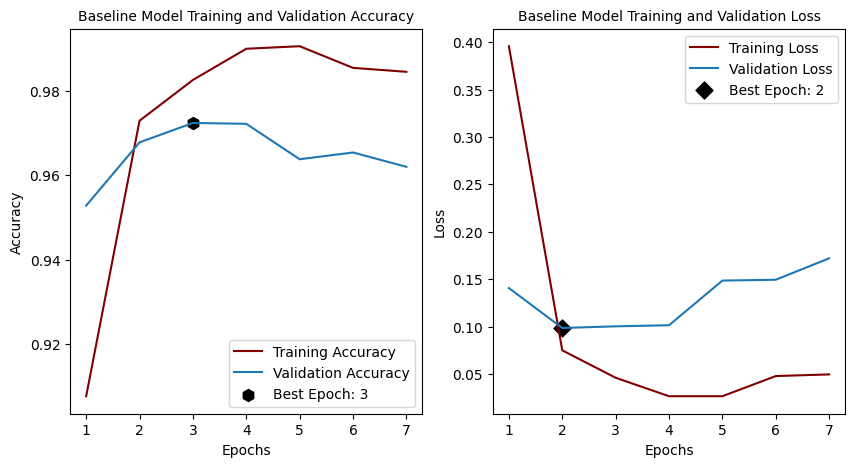

In [54]:
# (i) the training and validation losses and accuracies on the training and validation set through epochs
summarize_diagnostics(history_vgg)

In [55]:
# prediction based on X_valid
best_vgg_model = load_model('/content/drive/MyDrive/DeepLearning/Assignment/model_vgg.hp5')
class_prob_val = best_vgg_model.predict(X_valid) # predict class probabilities
y_valid_pred= np.argmax(class_prob_val, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 9s 40ms/step


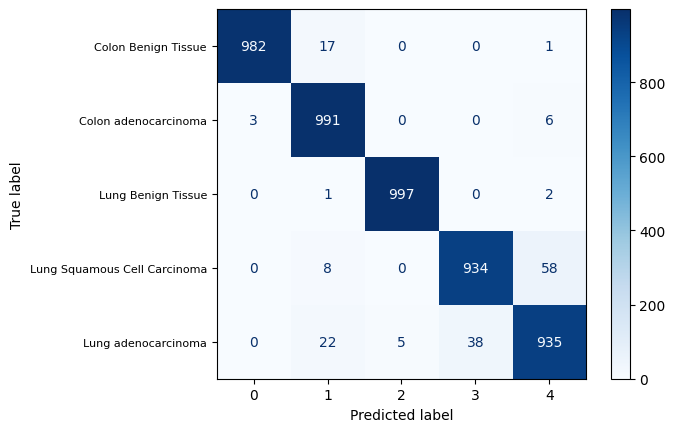

In [56]:
#  report confusion matrix for validation data
report_confusion_matrix (y_valid_cat, y_valid_pred)

In [57]:
# report performance measures on validation sets
print("\nPerformance measures for validation set:\n",classification_report(y_valid_cat, y_valid_pred, target_names= label_encoder.classes_))


Performance measures for validation set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       1.00      0.98      0.99      1000
        Colon adenocarcinoma       0.95      0.99      0.97      1000
          Lung Benign Tissue       1.00      1.00      1.00      1000
Lung Squamous Cell Carcinoma       0.96      0.93      0.95      1000
         Lung adenocarcinoma       0.93      0.94      0.93      1000

                    accuracy                           0.97      5000
                   macro avg       0.97      0.97      0.97      5000
                weighted avg       0.97      0.97      0.97      5000



In [58]:
# evaluate the model
test_loss, test_accuracy = best_vgg_model.evaluate(X_test, y_test)
print("test loss:",test_loss,"  ","test_accuracy:", test_accuracy)

# prediction based on X_test
class_prob_test = vgg_model.predict(X_test) # predict class probabilities
y_pred = np.argmax(class_prob_test, axis=1) # define predicted class as one with the highest probability

157/157 [==============================] - 7s 41ms/step - loss: 0.1039 - accuracy: 0.9664
test loss: 0.10386409610509872    test_accuracy: 0.9664000272750854
157/157 [==============================] - 7s 42ms/step


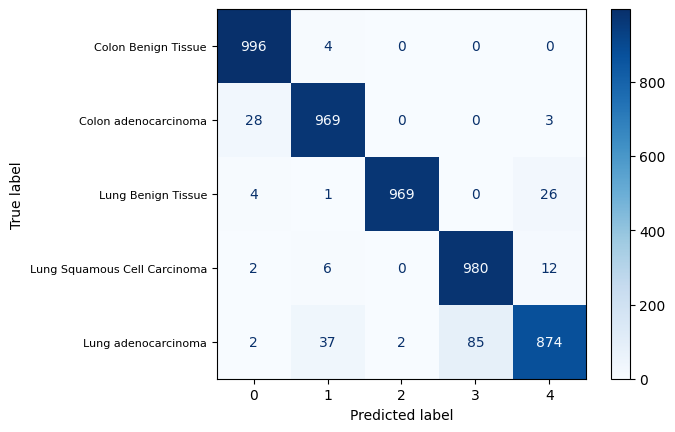

In [59]:
# report confusion matrix for test data
report_confusion_matrix (y_test_cat, y_pred)

In [60]:
# report performance measures on validation and test sets
print("Performance measures for test set:\n", classification_report(y_test_cat, y_pred, target_names= label_encoder.classes_))

Performance measures for test set:
                               precision    recall  f1-score   support

         Colon Benign Tissue       0.97      1.00      0.98      1000
        Colon adenocarcinoma       0.95      0.97      0.96      1000
          Lung Benign Tissue       1.00      0.97      0.98      1000
Lung Squamous Cell Carcinoma       0.92      0.98      0.95      1000
         Lung adenocarcinoma       0.96      0.87      0.91      1000

                    accuracy                           0.96      5000
                   macro avg       0.96      0.96      0.96      5000
                weighted avg       0.96      0.96      0.96      5000



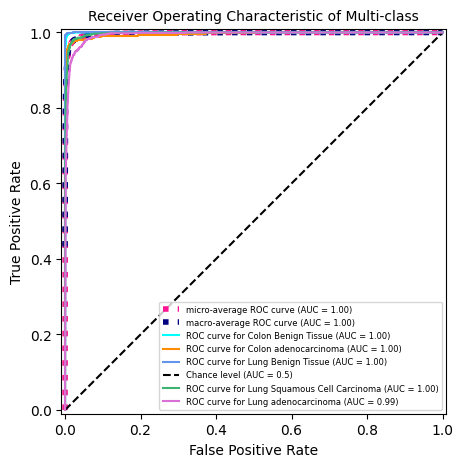

In [61]:
#  plot ROC curve for test data
plot_roc_curve(y_test, class_prob_test)